In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pprint import pprint
import os

In [2]:
#example url: https://comtrade.un.org/api/refs/da/view?type=C&freq=M&ps=201607&px=HS.
#b_url='http://comtrade.un.org/api/get?max=10000&type=C&freq=M&px=H4&ps=202001&r=842&p=124&rg=02&cc=AG6&fmt=json'
       
data_path= "TMEC trade Ag.csv"

trade_data = pd.read_csv(data_path)
trade_df=pd.DataFrame(trade_data)

file = 'covid_data.csv'
cov_df = pd.read_csv(file, encoding="ISO-8859-1")

In [3]:
tmec=trade_df.drop(['Unnamed: 65', 'Unnamed: 66'],axis=1)

In [4]:
imp_df=tmec.loc[tmec['Trade flow']=='Imports',:].reset_index(drop=True)
exp_df=tmec.loc[tmec['Trade flow']=='Exports',:].reset_index(drop=True)
exp_df

,Indicator,Trade flow,Commodity,Partner,Reporter,2016-01,2016-02,2016-03,2016-04,2016-05,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,Value (US$),Exports,TOTAL Total of all HS commodities,Canada,Mexico,"673,513,620.00","855,808,067.00","1,030,015,330.00","835,010,153.00","901,328,049.00",...,"1,109,045,534.00","421,954,600.00","374,476,087.00","869,043,591.00","904,055,805.00","1,090,931,071.00","989,978,120.00","1,126,677,049.00",NaN,NaN
1,Value (US$),Exports,TOTAL Total of all HS commodities,Canada,USA,"19,795,340,021.00","20,798,135,479.00","23,126,750,115.00","23,379,246,350.00","22,923,021,254.00",...,"23,522,242,488.00","14,768,997,561.00","14,809,489,186.00","20,096,422,899.00","21,076,439,049.00","22,816,331,283.00","23,288,055,490.00","23,574,920,507.00","22,570,607,916.00",NaN
2,Value (US$),Exports,TOTAL Total of all HS commodities,Mexico,Canada,"349,304,305.00","418,771,385.00","489,216,411.00","485,333,756.00","496,797,466.00",...,"418,679,078.00","243,021,094.00","234,352,818.00","353,621,473.00","366,787,563.00","365,463,812.00","446,175,634.00","443,339,880.00","500,151,076.00",NaN
3,Value (US$),Exports,TOTAL Total of all HS commodities,Mexico,USA,"18,065,821,662.00","18,226,266,428.00","19,338,779,373.00","19,385,064,326.00","19,040,586,277.00",...,"20,048,068,514.00","12,527,542,645.00","10,440,323,370.00","15,787,255,885.00","18,448,794,043.00","17,047,019,040.00","18,703,114,281.00","20,508,218,453.00","19,301,947,369.00",NaN
4,Value (US$),Exports,TOTAL Total of all HS commodities,USA,Canada,"23,867,690,954.00","23,262,422,440.00","24,806,144,831.00","23,631,278,637.00","24,550,666,441.00",...,"26,277,476,981.00","16,081,005,262.00","16,663,364,333.00","21,681,509,649.00","23,586,497,746.00","25,179,536,853.00","26,051,749,625.00","26,483,382,128.00","25,306,858,682.00",NaN
5,Value (US$),Exports,TOTAL Total of all HS commodities,USA,Mexico,"19,920,134,070.00","23,901,500,481.00","25,790,492,773.00","25,003,684,997.00","25,622,192,628.00",...,"30,435,295,097.00","18,421,814,835.00","13,883,500,369.00","27,228,760,162.00","28,355,292,444.00","29,060,437,104.00","30,754,189,467.00","33,566,465,319.00",NaN,NaN
6,Value (US$),Exports,TOTAL Total of all HS commodities,World,Canada,"30,661,384,053.00","29,975,184,377.00","32,832,105,795.00","31,217,949,170.00","31,422,297,938.00",...,"34,447,662,185.00","23,380,379,134.00","24,301,246,434.00","30,235,321,537.00","31,830,670,694.00","32,724,917,593.00","34,949,204,247.00","35,747,407,550.00","35,580,426,870.00",NaN
7,Value (US$),Exports,TOTAL Total of all HS commodities,World,Mexico,"24,684,194,656.00","28,964,812,666.00","31,486,477,565.00","30,412,058,211.00","31,322,088,365.00",...,"38,342,697,819.00","23,383,299,067.00","18,068,348,857.00","33,076,474,130.00","35,655,846,025.00","36,979,024,492.00","38,546,606,327.00","41,944,511,089.00",NaN,NaN
8,Value (US$),Exports,TOTAL Total of all HS commodities,World,USA,"108,368,728,961.00","113,730,987,672.00","125,400,958,429.00","119,003,815,948.00","119,566,117,670.00",...,"134,400,749,545.00","95,683,779,400.00","90,584,959,523.00","104,967,248,780.00","112,581,599,137.00","117,958,253,650.00","121,378,736,772.00","132,402,660,776.00","126,854,420,188.00",NaN
9,Value (US$),Exports,02 Meat and edible meat offal,Canada,Mexico,"819,220.00","1,130,430.00","1,372,573.00","1,799,649.00","1,472,612.00",...,"4,137,029.00","3,486,411.00","7,898,825.00","5,991,751.00","3,814,487.00","5,080,620.00","6,149,888.00","4,724,832.00",NaN,NaN


In [5]:
clean_imp_df=imp_df.loc[(imp_df['Reporter']!=imp_df['Partner']),
                        :].reset_index(drop=True)
clean_imp_df

,Indicator,Trade flow,Commodity,Partner,Reporter,2016-01,2016-02,2016-03,2016-04,2016-05,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,Value (US$),Imports,TOTAL Total of all HS commodities,Canada,Mexico,"616,082,948.00","734,425,437.00","795,886,416.00","843,822,934.00","782,138,807.00",...,"824,983,405.00","423,108,511.00","323,312,821.00","665,473,495.00","663,198,246.00","654,271,093.00","753,245,474.00","865,370,942.00",NaN,NaN
1,Value (US$),Imports,TOTAL Total of all HS commodities,Canada,USA,"22,618,935,265.00","22,234,984,601.00","23,696,294,478.00","22,965,732,358.00","23,441,782,704.00",...,"25,696,825,566.00","15,482,519,876.00","16,246,298,654.00","20,750,823,383.00","22,791,660,795.00","24,161,621,428.00","24,978,417,218.00","25,276,305,487.00","24,645,357,273.00",NaN
2,Value (US$),Imports,TOTAL Total of all HS commodities,Mexico,Canada,"1,760,294,573.00","1,987,961,781.00","2,239,679,848.00","2,137,654,980.00","2,171,770,304.00",...,"2,077,590,376.00","1,085,474,255.00","970,843,922.00","1,730,127,788.00","1,812,059,201.00","1,919,481,677.00","1,892,828,637.00","2,144,905,606.00","2,231,898,446.00",NaN
3,Value (US$),Imports,TOTAL Total of all HS commodities,Mexico,USA,"22,640,155,215.00","23,425,192,088.00","24,988,587,287.00","25,342,744,376.00","25,079,902,330.00",...,"30,420,589,371.00","16,042,148,641.00","15,147,055,713.00","26,082,545,740.00","29,377,539,032.00","30,113,197,483.00","30,138,158,680.00","33,481,092,456.00","30,172,227,207.00",NaN
4,Value (US$),Imports,TOTAL Total of all HS commodities,USA,Canada,"15,475,199,346.00","16,546,208,648.00","18,283,733,431.00","18,719,942,683.00","18,661,974,043.00",...,"18,695,529,721.00","11,410,281,200.00","11,244,374,827.00","15,547,694,901.00","16,282,033,744.00","17,702,812,639.00","18,138,451,421.00","17,763,408,297.00","17,103,848,879.00",NaN
5,Value (US$),Imports,TOTAL Total of all HS commodities,USA,Mexico,"12,835,680,147.00","14,100,377,261.00","14,936,755,671.00","14,709,816,616.00","15,030,253,787.00",...,"16,456,091,577.00","9,770,597,965.00","7,762,750,083.00","11,942,290,920.00","13,234,482,568.00","13,923,186,814.00","15,100,344,564.00","16,155,059,113.00",NaN,NaN
6,Value (US$),Imports,TOTAL Total of all HS commodities,World,Canada,"29,254,528,441.00","31,189,056,477.00","34,602,690,862.00","34,357,052,591.00","34,460,229,227.00",...,"35,441,190,601.00","25,840,822,129.00","24,666,931,888.00","32,141,229,643.00","34,148,965,297.00","35,463,163,079.00","36,360,763,518.00","38,174,617,792.00","36,863,895,592.00",NaN
7,Value (US$),Imports,TOTAL Total of all HS commodities,World,Mexico,"27,977,456,989.00","29,749,340,671.00","31,406,562,260.00","32,495,321,206.00","31,852,309,294.00",...,"35,007,170,294.00","26,472,205,354.00","21,592,396,350.00","27,529,796,022.00","29,863,675,014.00","30,863,172,684.00","34,162,622,205.00","35,720,951,733.00",NaN,NaN
8,Value (US$),Imports,TOTAL Total of all HS commodities,World,USA,"170,796,005,963.00","173,246,584,457.00","183,461,764,284.00","179,474,808,736.00","188,620,797,220.00",...,"199,552,338,938.00","170,472,110,871.00","168,987,161,544.00","184,886,066,435.00","206,507,506,826.00","209,439,292,560.00","212,436,902,064.00","226,163,789,343.00","219,391,292,326.00",NaN
9,Value (US$),Imports,02 Meat and edible meat offal,Canada,Mexico,"24,502,708.00","26,241,096.00","24,197,067.00","26,929,582.00","26,196,996.00",...,"22,476,981.00","11,457,835.00","11,823,248.00","15,164,481.00","15,410,904.00","15,789,532.00","15,240,791.00","25,293,898.00",NaN,NaN


In [6]:
clean_exp_df=exp_df.loc[(exp_df['Reporter']!=exp_df['Partner']),
                        :].reset_index(drop=True)
clean_exp_df

,Indicator,Trade flow,Commodity,Partner,Reporter,2016-01,2016-02,2016-03,2016-04,2016-05,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,Value (US$),Exports,TOTAL Total of all HS commodities,Canada,Mexico,"673,513,620.00","855,808,067.00","1,030,015,330.00","835,010,153.00","901,328,049.00",...,"1,109,045,534.00","421,954,600.00","374,476,087.00","869,043,591.00","904,055,805.00","1,090,931,071.00","989,978,120.00","1,126,677,049.00",NaN,NaN
1,Value (US$),Exports,TOTAL Total of all HS commodities,Canada,USA,"19,795,340,021.00","20,798,135,479.00","23,126,750,115.00","23,379,246,350.00","22,923,021,254.00",...,"23,522,242,488.00","14,768,997,561.00","14,809,489,186.00","20,096,422,899.00","21,076,439,049.00","22,816,331,283.00","23,288,055,490.00","23,574,920,507.00","22,570,607,916.00",NaN
2,Value (US$),Exports,TOTAL Total of all HS commodities,Mexico,Canada,"349,304,305.00","418,771,385.00","489,216,411.00","485,333,756.00","496,797,466.00",...,"418,679,078.00","243,021,094.00","234,352,818.00","353,621,473.00","366,787,563.00","365,463,812.00","446,175,634.00","443,339,880.00","500,151,076.00",NaN
3,Value (US$),Exports,TOTAL Total of all HS commodities,Mexico,USA,"18,065,821,662.00","18,226,266,428.00","19,338,779,373.00","19,385,064,326.00","19,040,586,277.00",...,"20,048,068,514.00","12,527,542,645.00","10,440,323,370.00","15,787,255,885.00","18,448,794,043.00","17,047,019,040.00","18,703,114,281.00","20,508,218,453.00","19,301,947,369.00",NaN
4,Value (US$),Exports,TOTAL Total of all HS commodities,USA,Canada,"23,867,690,954.00","23,262,422,440.00","24,806,144,831.00","23,631,278,637.00","24,550,666,441.00",...,"26,277,476,981.00","16,081,005,262.00","16,663,364,333.00","21,681,509,649.00","23,586,497,746.00","25,179,536,853.00","26,051,749,625.00","26,483,382,128.00","25,306,858,682.00",NaN
5,Value (US$),Exports,TOTAL Total of all HS commodities,USA,Mexico,"19,920,134,070.00","23,901,500,481.00","25,790,492,773.00","25,003,684,997.00","25,622,192,628.00",...,"30,435,295,097.00","18,421,814,835.00","13,883,500,369.00","27,228,760,162.00","28,355,292,444.00","29,060,437,104.00","30,754,189,467.00","33,566,465,319.00",NaN,NaN
6,Value (US$),Exports,TOTAL Total of all HS commodities,World,Canada,"30,661,384,053.00","29,975,184,377.00","32,832,105,795.00","31,217,949,170.00","31,422,297,938.00",...,"34,447,662,185.00","23,380,379,134.00","24,301,246,434.00","30,235,321,537.00","31,830,670,694.00","32,724,917,593.00","34,949,204,247.00","35,747,407,550.00","35,580,426,870.00",NaN
7,Value (US$),Exports,TOTAL Total of all HS commodities,World,Mexico,"24,684,194,656.00","28,964,812,666.00","31,486,477,565.00","30,412,058,211.00","31,322,088,365.00",...,"38,342,697,819.00","23,383,299,067.00","18,068,348,857.00","33,076,474,130.00","35,655,846,025.00","36,979,024,492.00","38,546,606,327.00","41,944,511,089.00",NaN,NaN
8,Value (US$),Exports,TOTAL Total of all HS commodities,World,USA,"108,368,728,961.00","113,730,987,672.00","125,400,958,429.00","119,003,815,948.00","119,566,117,670.00",...,"134,400,749,545.00","95,683,779,400.00","90,584,959,523.00","104,967,248,780.00","112,581,599,137.00","117,958,253,650.00","121,378,736,772.00","132,402,660,776.00","126,854,420,188.00",NaN
9,Value (US$),Exports,02 Meat and edible meat offal,Canada,Mexico,"819,220.00","1,130,430.00","1,372,573.00","1,799,649.00","1,472,612.00",...,"4,137,029.00","3,486,411.00","7,898,825.00","5,991,751.00","3,814,487.00","5,080,620.00","6,149,888.00","4,724,832.00",NaN,NaN


In [7]:
i_wrld_df=clean_imp_df.loc[(clean_imp_df['Partner']=='World') & (clean_imp_df['Commodity']=='TOTAL Total of all HS commodities'),:].reset_index(drop=True).transpose(copy=True)
i_wrld_df.reset_index(inplace=True)
i_wrld_df

,index,0,1,2
0,Indicator,Value (US$),Value (US$),Value (US$)
1,Trade flow,Imports,Imports,Imports
2,Commodity,TOTAL Total of all HS commodities,TOTAL Total of all HS commodities,TOTAL Total of all HS commodities
3,Partner,World,World,World
4,Reporter,Canada,Mexico,USA
...,...,...,...,...
60,2020-08,"35,463,163,079.00","30,863,172,684.00","209,439,292,560.00"
61,2020-09,"36,360,763,518.00","34,162,622,205.00","212,436,902,064.00"
62,2020-10,"38,174,617,792.00","35,720,951,733.00","226,163,789,343.00"
63,2020-11,"36,863,895,592.00",NaN,"219,391,292,326.00"


In [8]:
e_wrld_df=clean_exp_df.loc[(clean_exp_df['Partner']=='World') & (clean_exp_df['Commodity']=='TOTAL Total of all HS commodities'),:].reset_index(drop=True).transpose(copy=True)
e_wrld_df.reset_index(inplace=True)
e_wrld_df.drop([0,1,2,3,4],inplace=True)
e_wrld_df.columns =['Period', 'Canada', 'Mexico', 'USA']
e_wrld_df['Year']=e_wrld_df['Period'].str.slice(0,4)
e_wrld_df['Month']=e_wrld_df['Period'].str.slice(5,7)
e_wrld_df['Date']=e_wrld_df['Year'] + e_wrld_df['Month']
e_wrld_df2 = e_wrld_df.drop(['Period','Year','Month'], axis=1)

e_wrld_df2['Canada'] = e_wrld_df2['Canada'].fillna(0.0)
e_wrld_df2['Mexico'] = e_wrld_df2['Mexico'].fillna(0.0)
e_wrld_df2['USA'] = e_wrld_df2['USA'].fillna(0.0)

e_wrld_df2.replace(',','', regex=True, inplace=True)

e_wrld_df2['Date'] = e_wrld_df2['Date'].astype('int')
e_wrld_df2['Canada'] = e_wrld_df2['Canada'].astype('float')
e_wrld_df2['Mexico'] = e_wrld_df2['Mexico'].astype('float')
e_wrld_df2['USA'] = e_wrld_df2['USA'].astype('float')

e_wrld_df2 = e_wrld_df2.loc[(e_wrld_df2['Date'])>201712]. reset_index(drop=True)
e_wrld_df2['Date'] = e_wrld_df2['Date'].astype('str')
e_wrld_df2

,Canada,Mexico,USA,Date
0,3.637806e+10,3.071858e+10,1.249055e+11,201801
1,3.360112e+10,3.509284e+10,1.281317e+11,201802
2,3.837132e+10,3.948077e+10,1.497962e+11,201803
3,3.730548e+10,3.718096e+10,1.379873e+11,201804
4,3.944971e+10,3.921415e+10,1.453828e+11,201805
5,3.991025e+10,3.748375e+10,1.453282e+11,201806
6,3.744805e+10,3.674136e+10,1.336582e+11,201807
7,3.865465e+10,3.954088e+10,1.400673e+11,201808
8,3.730289e+10,3.770033e+10,1.391131e+11,201809
9,3.975650e+10,4.135475e+10,1.470736e+11,201810


In [9]:
e_t_wrld_df = e_wrld_df2.groupby(['Date'])[['Canada', 'Mexico', 'USA']].sum().reset_index()
e_t_wrld_df

,Date,Canada,Mexico,USA
0,201801,3.637806e+10,3.071858e+10,1.249055e+11
1,201802,3.360112e+10,3.509284e+10,1.281317e+11
2,201803,3.837132e+10,3.948077e+10,1.497962e+11
3,201804,3.730548e+10,3.718096e+10,1.379873e+11
4,201805,3.944971e+10,3.921415e+10,1.453828e+11
5,201806,3.991025e+10,3.748375e+10,1.453282e+11
6,201807,3.744805e+10,3.674136e+10,1.336582e+11
7,201808,3.865465e+10,3.954088e+10,1.400673e+11
8,201809,3.730289e+10,3.770033e+10,1.391131e+11
9,201810,3.975650e+10,4.135475e+10,1.470736e+11


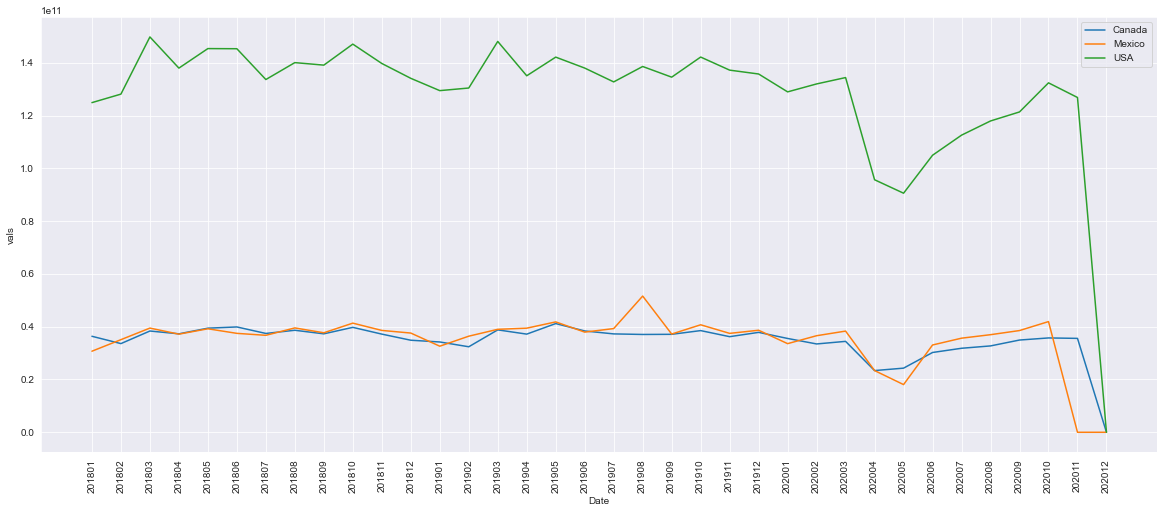

In [10]:

plot_df = e_t_wrld_df.melt('Date', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
g = sns.lineplot(x="Date", y="vals", hue='cols', data=plot_df)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')

plt.show()


In [11]:
cov_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
205946,205947,01/19/2021,Zaporizhia Oblast,Ukraine,20/01/2021 05:21,62492,738,39168
205947,205948,01/19/2021,Zeeland,Netherlands,20/01/2021 05:21,13031,149,0
205948,205949,01/19/2021,Zhejiang,Mainland China,20/01/2021 05:21,1316,1,1298
205949,205950,01/19/2021,Zhytomyr Oblast,Ukraine,20/01/2021 05:21,42758,707,37834


In [12]:
cln_cov_df = cov_df.drop(['Province/State','Last Update','SNo','Deaths','Recovered'],axis=1)
date = cln_cov_df['ObservationDate'].str.split(pat="/", expand = True)
cln_cov_df['Month'] = date[0]
cln_cov_df['Year'] = date[2]
m = (cln_cov_df['Country/Region'] == 'Mexico') | (cln_cov_df['Country/Region'] == 'US') | (cln_cov_df['Country/Region'] == 'Canada')
cln_cov_df2 = cln_cov_df.loc[m,:]
na_cov_df = cln_cov_df2.groupby(['Year','Month'])[['Confirmed']].sum().reset_index()
na_cov_df["Date"] = na_cov_df['Year'] + na_cov_df['Month']
na_cov_df2 = na_cov_df.drop(['Year', 'Month'],axis=1)

In [13]:
cov_econ_wrld = e_t_wrld_df.join(na_cov_df2.set_index('Date'), on='Date')
cov_econ_wrld

,Date,Canada,Mexico,USA,Confirmed
0,201801,3.637806e+10,3.071858e+10,1.249055e+11,NaN
1,201802,3.360112e+10,3.509284e+10,1.281317e+11,NaN
2,201803,3.837132e+10,3.948077e+10,1.497962e+11,NaN
3,201804,3.730548e+10,3.718096e+10,1.379873e+11,NaN
4,201805,3.944971e+10,3.921415e+10,1.453828e+11,NaN
5,201806,3.991025e+10,3.748375e+10,1.453282e+11,NaN
6,201807,3.744805e+10,3.674136e+10,1.336582e+11,NaN
7,201808,3.865465e+10,3.954088e+10,1.400673e+11,NaN
8,201809,3.730289e+10,3.770033e+10,1.391131e+11,NaN
9,201810,3.975650e+10,4.135475e+10,1.470736e+11,NaN


<ipython-input-14-037b2f9d5fce>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax.get_yticks().tolist()])
<ipython-input-14-037b2f9d5fce>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax2.get_yticks().tolist()])


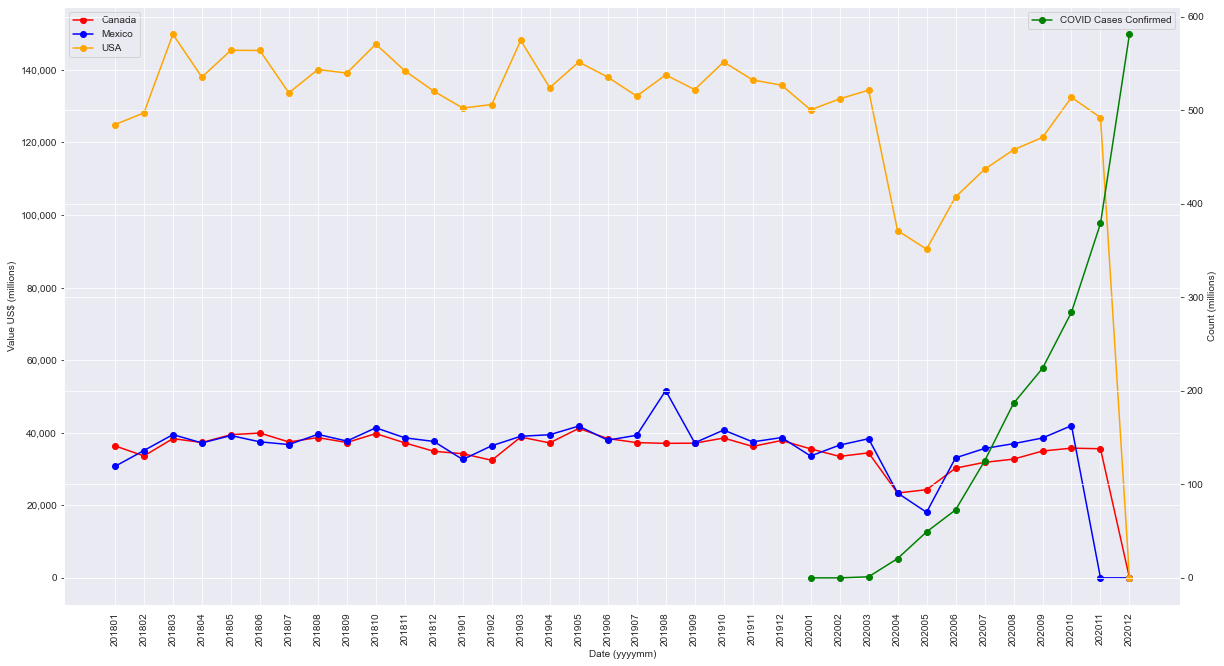

In [14]:
fig, ax= plt.subplots()
ax.plot(cov_econ_wrld.Date, cov_econ_wrld.Canada, color="red", marker="o", label="Canada")
ax.plot(cov_econ_wrld.Date, cov_econ_wrld.Mexico, color="blue", marker="o", label="Mexico")
ax.plot(cov_econ_wrld.Date, cov_econ_wrld.USA, color="orange", marker="o", label="USA")
ax2=ax.twinx()
ax2.plot(cov_econ_wrld.Date, cov_econ_wrld.Confirmed, color="green", marker="o", label="COVID Cases Confirmed")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
leg = ax.legend(loc='upper left')
leg2 = ax2.legend()
ax.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax.get_yticks().tolist()])
ax2.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax2.get_yticks().tolist()])
ax.set_xlabel('Date (yyyymm)')
ax.set_ylabel('Value US$ (millions)')
ax2.set_ylabel('Count (millions)')
fig.set_size_inches(20,11)
plt.show()